In [25]:
import numpy as np;
x = np.array([[1,3,5,7,9,13,20,20,21,24,26] ,[5,7,11,14,15,17,18,19,21,22,26]] )
x =x.T # T- Transpose
print(x)

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]
 [13 17]
 [20 18]
 [20 19]
 [21 21]
 [24 22]
 [26 26]]


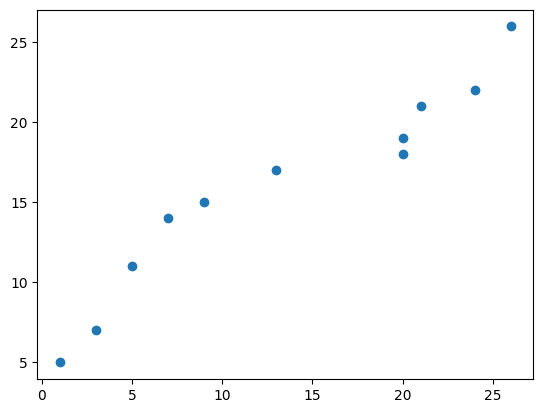

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])

[[-12.54545455 -10.90909091]
 [-10.54545455  -8.90909091]
 [ -8.54545455  -4.90909091]
 [ -6.54545455  -1.90909091]
 [ -4.54545455  -0.90909091]
 [ -0.54545455   1.09090909]
 [  6.45454545   2.09090909]
 [  6.45454545   3.09090909]
 [  7.45454545   5.09090909]
 [ 10.45454545   6.09090909]
 [ 12.45454545  10.09090909]]


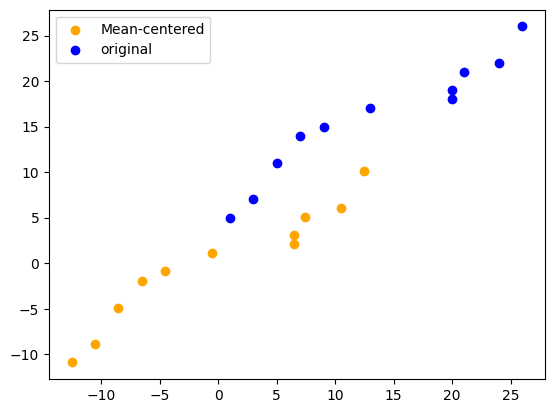

In [41]:
x_meaned = x - np.mean(x,axis = 0 )
print(x_meaned)

plt.scatter(x_meaned[:,0],x_meaned[:,1],label= "Mean-centered",color='orange') # Normalizing the data with zero mean
plt.scatter(x[:,0],x[:,1], label = "original", color='blue')
plt.legend()


In [28]:
#Covariance matrix 
c = np.cov(x_meaned, rowvar = False)
print(c)

[[80.87272727 54.95454545]
 [54.95454545 40.69090909]]


In [29]:
eval, evec = np.linalg.eig(c) # eigen values and vectors
print(eval)
print(evec)

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [30]:
sorted_index =np.argsort(eval)[ : : -1] # -1 to arrange in descending order  # position is sorted - index vise according to eval
sorted_eval = eval[sorted_index] # Arranges the eigen values

sorted_evec = evec[:,sorted_index]


In [31]:
n = 1 # No pf componets (dimensions)
evec_subset = sorted_evec[:,0:n ] # (: all rows , 0:n columns - only one feature with n number of rows selected out of two features)
print(evec_subset)

[[0.81956216]
 [0.57299028]]


In [32]:
x_reduced = np.dot(evec_subset.T, x_meaned.T).T
print(x_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


In [33]:
# DIRECT METHOD
from sklearn.decomposition import PCA # sklearn - has many ML algorith 
pca = PCA(n_components = 1) # n_components - argument 
pca.fit(x_meaned) # finds covariance , eigen values and eigenvectors, stores top n_components = 1
xr = pca.transform(x_meaned) # projects data onto FIRST principal component , xr - x reduced
print(xr)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


**IRIS DATASET FROM SKLEARN**     
- This four features(4D) and describes about three variety of flowers - 50 SAMPLES for each flowers so total 150 samples
- SKLEARN HAS MANY DATASETS


In [35]:
from sklearn import datasets
iris = datasets.load_iris()
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

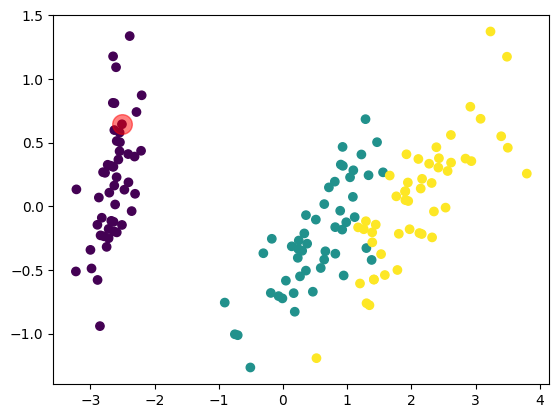

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = 2)
pca.fit(iris.data)
irisr = pca.transform(iris.data)

plt.scatter(irisr[:,0],irisr[:,1],c = iris.target)
plt.scatter([irisr[10][0]],[irisr[10][1]] ,s = [200], c = ["r"], alpha = 0.5) # 11 sample is highlighted - which is of serosa 

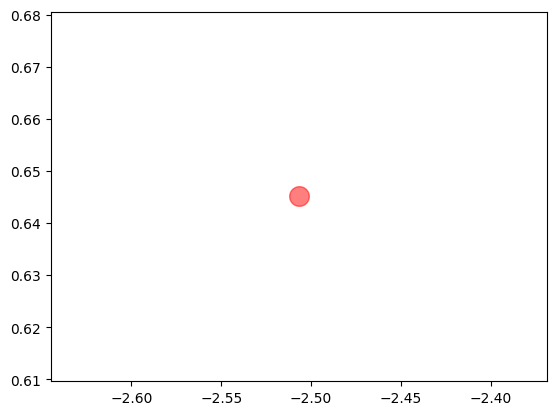

In [52]:
plt.scatter([irisr[10][0]],[irisr[10][1]] ,s = [200], c = ["r"], alpha = 0.5)